# Using PCA to explore the school budget data

In this notebook, we use PCA to explore NYC School expenditures.

In [28]:
import pandas as pd

data_2006 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2006.csv', index_col=0)
data_2007 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2007.csv', index_col=0)
data_2008 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2008.csv', index_col=0)
data_2009 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2009.csv', index_col=0)
data_2010 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2010.csv', index_col=0)
data_2011 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2011.csv', index_col=0)
data_2012 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2012.csv', index_col=0)

In [29]:
all_years_data = {2006: data_2006, 2007: data_2007, 2008: data_2008, 2009: data_2009, 2010: data_2010, 2011: data_2011, 2012: data_2012}
for year in all_years_data:
    print all_years_data[year].shape

(1347, 52)
(1366, 52)
(1391, 53)
(1437, 52)
(1472, 53)
(1497, 53)
(1508, 51)


Next we need to scale and center numeric data.

In [30]:
for year in all_years_data:
    print all_years_data[year].shape
    numeric = all_years_data[year].drop(['Title_1', 'District','School'], axis=1)
    numeric = (numeric - numeric.mean())
    numeric = numeric / numeric.max()
    all_years_data[year] = pd.concat([numeric, all_years_data[year][['Title_1','District','School']]], axis=1)
    print all_years_data[year].shape

(1347, 52)
(1347, 52)
(1366, 52)
(1366, 52)
(1391, 53)
(1391, 53)
(1437, 52)
(1437, 52)
(1472, 53)
(1472, 53)
(1497, 53)
(1497, 53)
(1508, 51)
(1508, 51)


Now let's use PCA and project onto the first two components:

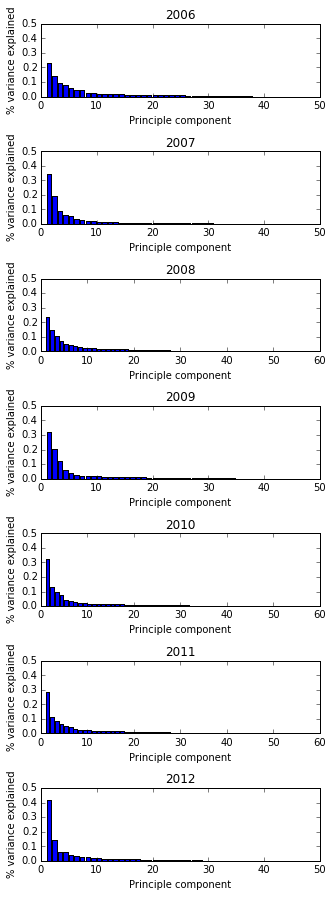

In [34]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,15))
fig.subplots_adjust(hspace=.75)
for year in all_years_data:
    X = all_years_data[year].drop(['Title_1', 'District', 'School'], axis=1)
    pca = PCA()
    pca.fit_transform(X)
    ax = plt.subplot(7,1,year-2005)
    ax.bar(np.arange(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
    ax.set_title(str(year))
    ax.set_ylabel('% variance explained')
    ax.set_yticks(np.arange(0,0.6,0.1), minor=False)
    ax.set_xlabel('Principle component')

(1347, 49)
(1366, 49)
(1391, 50)
(1437, 49)
(1472, 50)
(1497, 50)
(1508, 48)


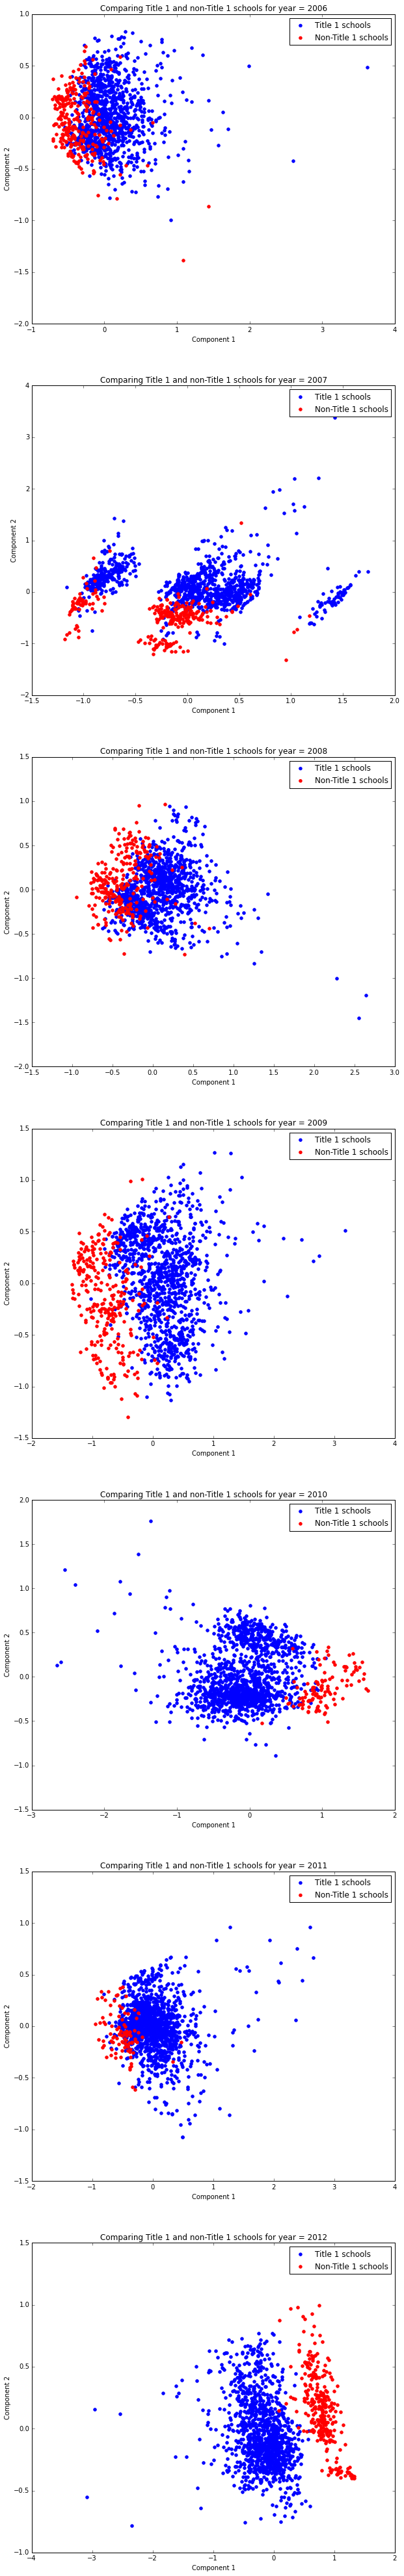

In [36]:
fig = plt.figure(figsize=(10,70))
for year in all_years_data:
    X = all_years_data[year].drop(['Title_1', 'District','School'], axis=1)
    print X.shape
    pca = PCA()
    trans_x = pca.fit_transform(X)
    ax = plt.subplot(7,1,year-2005)
    mask = (all_years_data[year]['Title_1'] == 1)
    ax.scatter(trans_x[mask.values,0],trans_x[mask.values,1], color='b', label='Title 1 schools')
    ax.scatter(trans_x[~mask.values,0],trans_x[~mask.values,1], color='r', label='Non-Title 1 schools')
    Title = 'Comparing Title 1 and non-Title 1 schools for year = ' + str(year)
    ax.legend(scatterpoints=1)
    ax.set_title(Title)
    ax.set_ylabel('Component 2')
    ax.set_xlabel('Component 1')

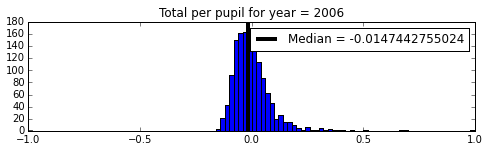

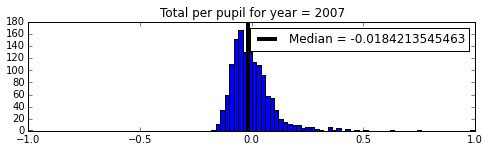

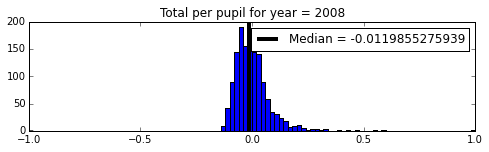

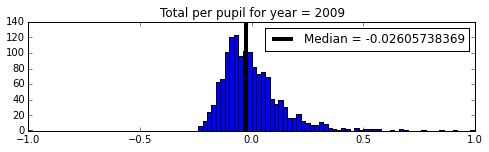

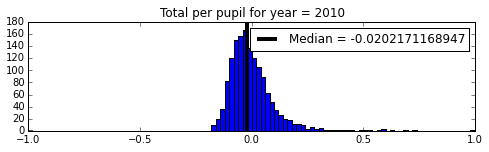

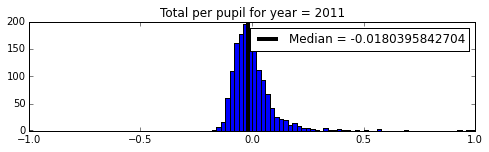

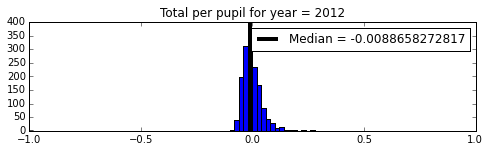

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

for year in range(2006,2013):
    plt.figure(figsize=(8,16))
    ax = plt.subplot(7,1,year-2005)
    ax.hist(all_years_data[year]['Total'],bins=100, range=(-1,1))
    key = 'Median = ' + str(all_years_data[year]['Total'].median())
    ax.axvline(all_years_data[year]['Total'].median(), color='k', linewidth=4, label=key)
    Title = 'Total per pupil for year = ' + str(year)
    ax.set_title(Title)
    ax.set_xlim(-1,1)
    ax.legend()

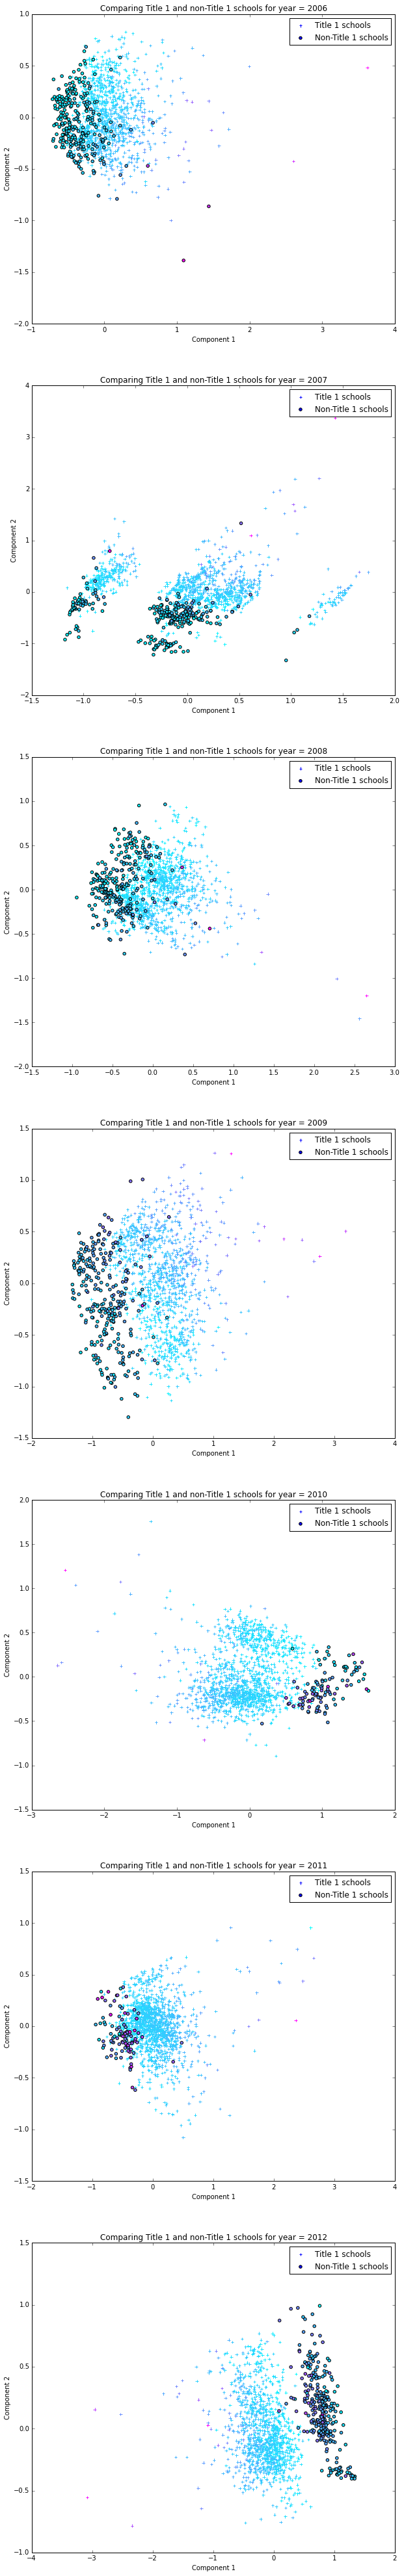

In [39]:
fig = plt.figure(figsize=(10,70))
for year in all_years_data:
    X = all_years_data[year].drop(['Title_1', 'District','School'], axis=1)
    pca = PCA()
    trans_x = pca.fit_transform(X)
    ax = plt.subplot(7,1,year-2005)
    mask = (all_years_data[year]['Title_1'] == 1)
    ax.scatter(trans_x[mask.values,0],trans_x[mask.values,1], marker='+', c=X[mask].Teachers.values, cmap='cool', label='Title 1 schools')
    ax.scatter(trans_x[~mask.values,0],trans_x[~mask.values,1], marker='o', c=X[~mask].Teachers.values, cmap='cool', label='Non-Title 1 schools')
    Title = 'Comparing Title 1 and non-Title 1 schools for year = ' + str(year)
    ax.legend(scatterpoints=1)
    ax.set_title(Title)
    ax.set_ylabel('Component 2')
    ax.set_xlabel('Component 1')